In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
def generateGaussian(t_idx):
    return torch.normal(t_idx[0], t_idx[1], (1, 42, 42))

In [3]:
class MyDataset(Dataset):
    def __init__(self, n):
        classes = {
            0: (0.5, 2),
            1: (1, 2.5)
        }
        self.Y = [torch.round(torch.rand(1))[0].long() for i in range(n)]
        self.X = [generateGaussian(classes[self.Y[i].item()]) for i in range(n)]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

    def __len__(self):
        return len(self.X)

In [4]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        
        conv_layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=2),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
        )
        conv_layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
        )
        conv_layer3 = nn.Sequential(
            nn.Conv2d(32, 4, kernel_size=3, stride=2, padding=2),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
        )
        
        self.feature_extractor = nn.Sequential(
            conv_layer1, 
            conv_layer2,
            conv_layer3
        )
        
        self.classification_head = nn.Sequential(
            nn.Linear(4, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 2, bias=True)
        )            
        
    def forward(self, x):
        features = self.feature_extractor(x)
        return self.classification_head(features.view(features.shape[0], -1))

In [5]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))

In [6]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    

In [7]:
EPOCHS = 10
TRAIN_SIZE = 1000
TEST_SIZE = 200
BATCH_SIZE_TRAIN = 4
BATCH_SIZE_TEST = 1000
LR = 0.01
LOG_INTERVAL = 50
RANDOM_SEED = 1
DEVICE = torch.device("cpu")

torch.manual_seed(RANDOM_SEED)

In [8]:
train_dataset = MyDataset(TRAIN_SIZE)
test_dataset = MyDataset(TEST_SIZE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=True)

In [9]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

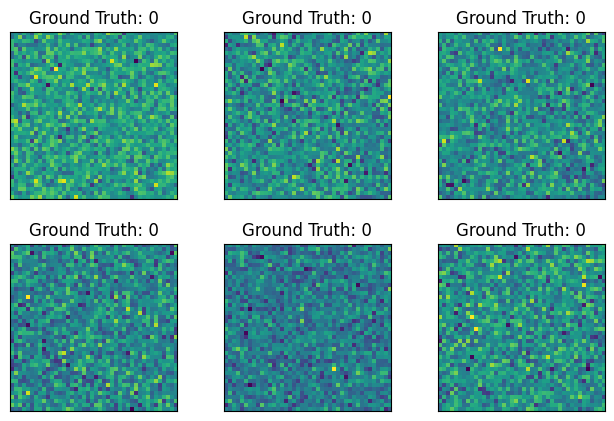

In [10]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

In [11]:
model = CNNClassifier().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR)

In [12]:
print(model)

CNNClassifier(
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 4, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (classification_head): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=2, bias=True)
  )
)


In [13]:
for epoch in range(1, EPOCHS + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/1000 (0%)]	Loss: 0.594300
Train Epoch: 1 [200/1000 (20%)]	Loss: 0.687511
Train Epoch: 1 [400/1000 (40%)]	Loss: 0.671554
Train Epoch: 1 [600/1000 (60%)]	Loss: 0.685993
Train Epoch: 1 [800/1000 (80%)]	Loss: 0.683474

Test set: Avg. loss: 0.0034, Accuracy: 90/200 (45%)

Train Epoch: 2 [0/1000 (0%)]	Loss: 0.608121
Train Epoch: 2 [200/1000 (20%)]	Loss: 0.679561
Train Epoch: 2 [400/1000 (40%)]	Loss: 0.661569
Train Epoch: 2 [600/1000 (60%)]	Loss: 0.612602
Train Epoch: 2 [800/1000 (80%)]	Loss: 0.625032

Test set: Avg. loss: 0.0027, Accuracy: 191/200 (96%)

Train Epoch: 3 [0/1000 (0%)]	Loss: 0.575983
Train Epoch: 3 [200/1000 (20%)]	Loss: 0.542666
Train Epoch: 3 [400/1000 (40%)]	Loss: 0.377961
Train Epoch: 3 [600/1000 (60%)]	Loss: 0.490977
Train Epoch: 3 [800/1000 (80%)]	Loss: 0.169513

Test set: Avg. loss: 0.0009, Accuracy: 188/200 (94%)

Train Epoch: 4 [0/1000 (0%)]	Loss: 0.206947
Train Epoch: 4 [200/1000 (20%)]	Loss: 0.196476
Train Epoch: 4 [400/1000 (40%)]	Loss: 0.100007
Tr

In [14]:
example_data_device = example_data.to(DEVICE)
model.eval()
with torch.no_grad():
    output = model(example_data_device)
    pred = output.data.max(1, keepdim=True)[1]

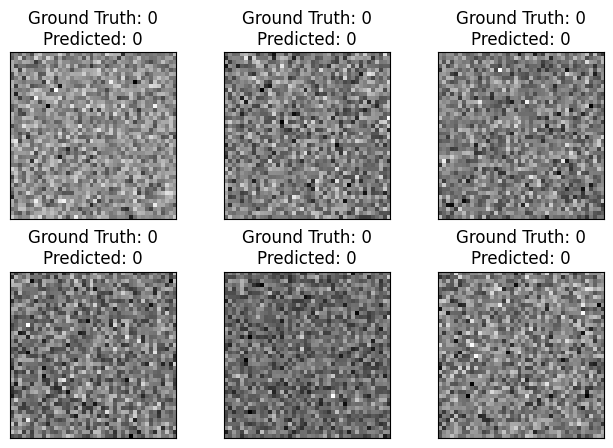

In [15]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}\nPredicted: {}".format(example_targets[i], pred[i].item()))
  plt.xticks([])
  plt.yticks([])

plt.show()